In [ ]:
from utils import return_all_filenames_in_path
from gpsutils import GPSNetwork, load_all_time_series_in_path, gps_data_for_date_from_timeseries, apply_filter_to_all_time_series
from filters import gaussian_filter
from datetime import datetime
import numpy as np

In [ ]:
filenames = return_all_filenames_in_path(path = 'data/GPS')

In [ ]:
my_network = GPSNetwork(filenames, prefix = 'data/GPS')

In [ ]:
my_network.plot()

In [ ]:
my_time_series = load_all_time_series_in_path('data/GPS')

In [ ]:
myfilter = gaussian_filter(10.0)
apply_filter_to_all_time_series(myfilter, my_time_series)

In [ ]:
import matplotlib.pylab as plt
plt.plot(my_time_series[1].time, my_time_series[1].ux,'k.')
plt.plot(my_time_series[1].time, my_time_series[1].field('filtered_ux'),'r-')

In [1]:
import pickle as p
(my_network, my_time_series) = p.load(open('data/GPSData.p', 'rb'))

In [2]:
strain_calculator = my_network.get_strain_calculator([0.001, 0.001], strain_method='delaunay', estimateradiuskm = 80.0, nstations = 4, strain_range=[-119.2,-118.6,37.47,37.82])

In [3]:
from gpsutils import strain_from_network_for_date, gps_data_for_date_from_timeseries
import numpy as np
from datetime import datetime

[lons, lats, rot_grd, exx_grd, exy_grd, eyy_grd] = strain_from_network_for_date(strain_calculator, my_time_series, np.datetime64(datetime(2015, 1, 17)), field_prefix = 'filtered')

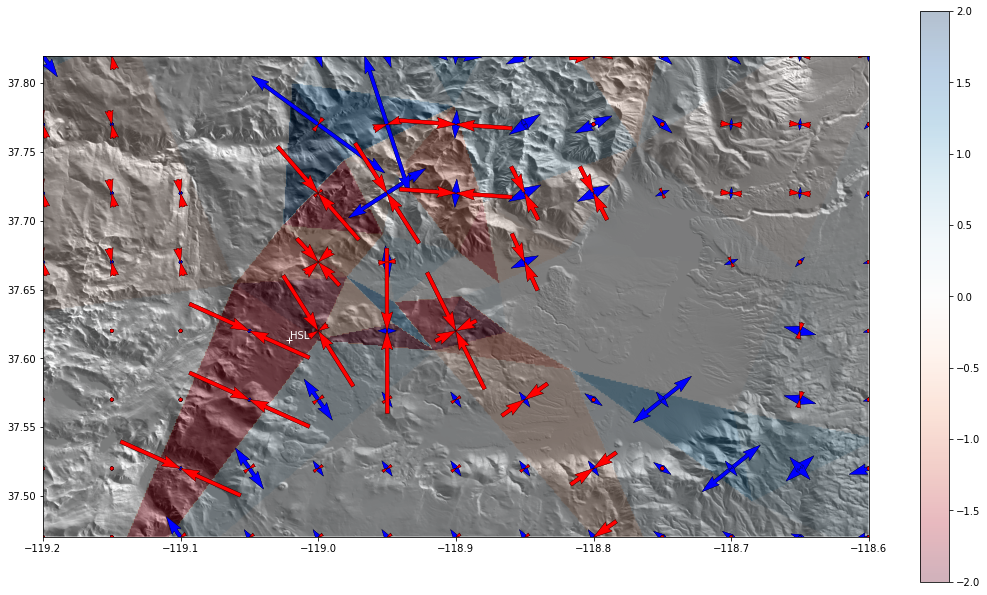

In [4]:
import matplotlib.pylab as plt
from plotting import plot_dilatation
plot_dilatation(lons, lats, exx_grd, exy_grd, eyy_grd, strain_calculator.strain_range, width=2000, eigs_dec = 50)
plt.gcf().set_size_inches(18.5, 10.5)


In [10]:
import numpy as np

def q(x, y, v):
    r = np.sqrt(np.power(x,2) + np.power(y,2))
    return (3 - v)*np.log(r) + (1 + v)*np.power(y,2) / np.power(r,2)

print(q(1E-80,1E-80,0.5))

-458.90058462310924


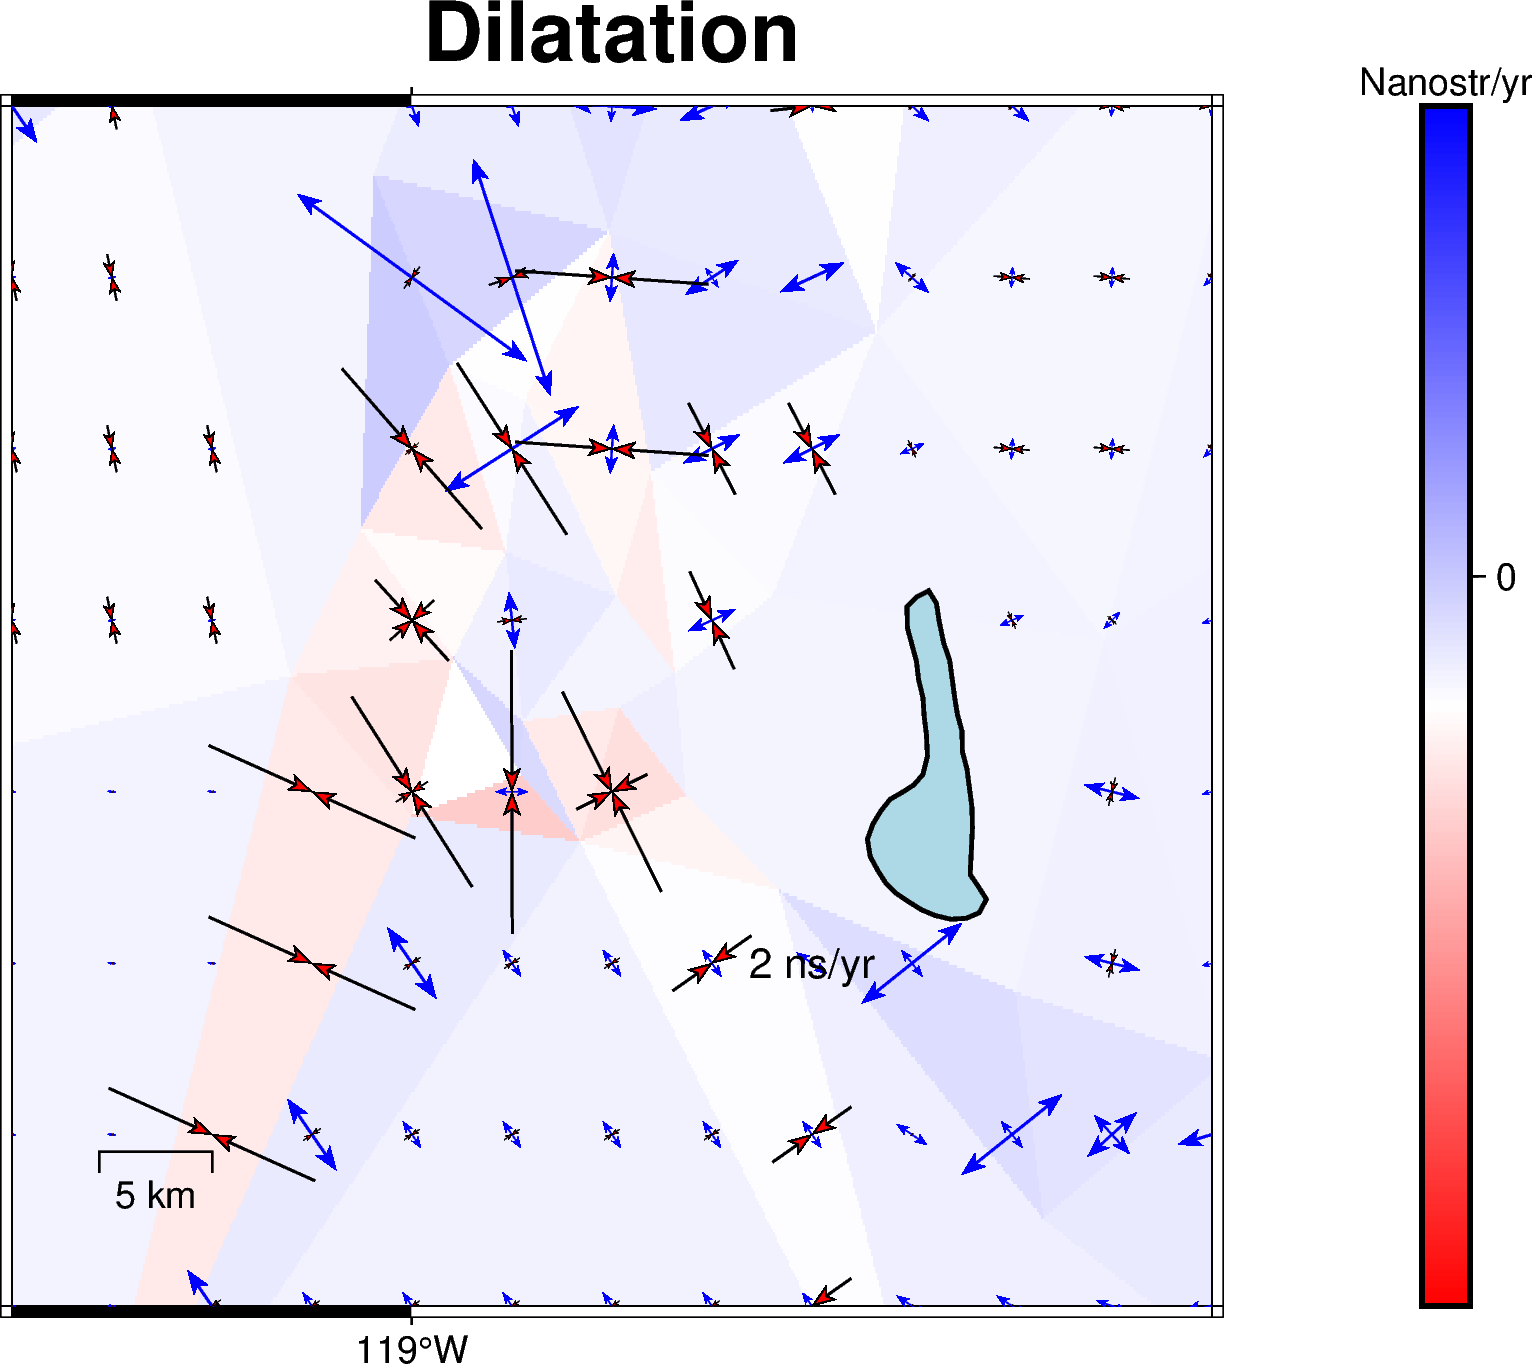

In [4]:
from plotting import plot_dilatation
plot_dilatation(lons, lats, exx_grd, exy_grd, eyy_grd, strain_calculator.strain_range, width=2000, eigs_dec = 50)

In [5]:
print(np.min(lons), np.max(lons), np.min(lats), np.max(lats))

-119.2 -118.59999999999714 37.47 37.81999999999918
